In [2]:
from util import * 
pd.options.display.max_columns  = 999
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

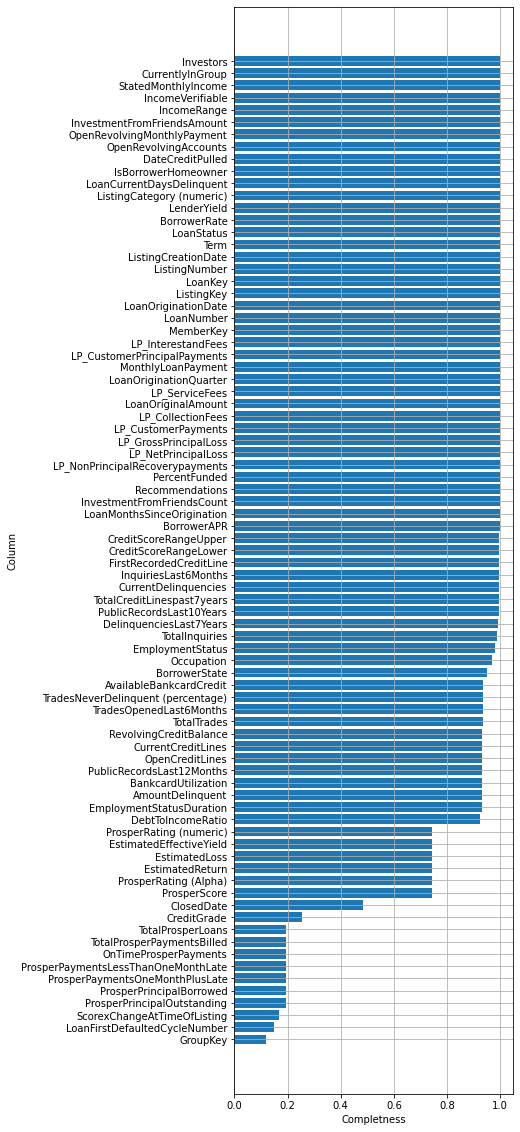

In [4]:
comp = (df.count() / df.shape[0]).sort_values()
plt.figure(figsize = [5,20])
plt.barh(y = comp.index , width =comp.values)
plt.xlabel('Completness')
plt.ylabel('Column')
plt.grid()




In [5]:
df[comp.index[::-1]].head()

,Investors,CurrentlyInGroup,StatedMonthlyIncome,IncomeVerifiable,IncomeRange,InvestmentFromFriendsAmount,OpenRevolvingMonthlyPayment,OpenRevolvingAccounts,DateCreditPulled,IsBorrowerHomeowner,LoanCurrentDaysDelinquent,ListingCategory (numeric),LenderYield,BorrowerRate,LoanStatus,Term,ListingCreationDate,ListingNumber,LoanKey,ListingKey,LoanOriginationDate,LoanNumber,MemberKey,LP_InterestandFees,LP_CustomerPrincipalPayments,MonthlyLoanPayment,LoanOriginationQuarter,LP_ServiceFees,LoanOriginalAmount,LP_CollectionFees,LP_CustomerPayments,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,LoanMonthsSinceOrigination,BorrowerAPR,CreditScoreRangeUpper,CreditScoreRangeLower,FirstRecordedCreditLine,InquiriesLast6Months,CurrentDelinquencies,TotalCreditLinespast7years,PublicRecordsLast10Years,DelinquenciesLast7Years,TotalInquiries,EmploymentStatus,Occupation,BorrowerState,AvailableBankcardCredit,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,TotalTrades,RevolvingCreditBalance,CurrentCreditLines,OpenCreditLines,PublicRecordsLast12Months,BankcardUtilization,AmountDelinquent,EmploymentStatusDuration,DebtToIncomeRatio,ProsperRating (numeric),EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (Alpha),ProsperScore,ClosedDate,CreditGrade,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber,GroupKey
0,258,True,3083.333333,True,"$25,000-49,999",0.0,24.0,1,2007-08-26 18:41:46.780000000,True,0,0,0.1380,0.1580,Completed,36,2007-08-26 19:09:29.263000000,193129,E33A3400205839220442E84,1021339766868145413AB3B,2007-09-12 00:00:00,19141,1F3E3376408759268057EDA,1971.14,9425.00,330.43,Q3 2007,-133.18,9425,0.0,11396.14,0.0,0.0,0.0,1.0,0,0,78,0.16516,659.0,640.0,2001-10-11 00:00:00,3.0,2.0,12.0,0.0,4.0,3.0,Self-employed,Other,CO,1500.0,0.81,0.0,11.0,0.0,5.0,4.0,0.0,0.00,472.0,2.0,0.17,NaN,NaN,NaN,NaN,NaN,NaN,2009-08-14 00:00:00,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,False,6125.000000,True,"$50,000-74,999",0.0,389.0,13,2014-02-27 08:28:14,False,0,2,0.0820,0.0920,Current,36,2014-02-27 08:28:07.900000000,1209647,9E3B37071505919926B1D82,10273602499503308B223C1,2014-03-03 00:00:00,134815,1D13370546739025387B2F4,0.00,0.00,318.93,Q1 2014,0.00,10000,0.0,0.00,0.0,0.0,0.0,1.0,0,0,0,0.12016,699.0,680.0,1996-03-18 00:00:00,3.0,0.0,29.0,1.0,0.0,5.0,Employed,Professional,CO,10266.0,1.00,2.0,29.0,3989.0,14.0,14.0,0.0,0.21,0.0,44.0,0.18,6.0,0.07960,0.0249,0.05470,A,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41,True,2083.333333,True,Not displayed,0.0,0.0,0,2007-01-02 14:09:10.060000000,False,0,0,0.2400,0.2750,Completed,36,2007-01-05 15:00:47.090000000,81716,6954337960046817851BCB2,0EE9337825851032864889A,2007-01-17 00:00:00,6466,5F7033715035555618FA612,1185.63,3001.00,123.32,Q1 2007,-24.20,3001,0.0,4186.63,0.0,0.0,0.0,1.0,0,0,86,0.28269,499.0,480.0,2002-07-27 00:00:00,0.0,1.0,3.0,0.0,0.0,1.0,Not available,Other,GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-17 00:00:00,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,783C3371218786870A73D20
3,158,False,2875.000000,True,"$25,000-49,999",0.0,115.0,7,2012-10-22 11:02:32,True,0,16,0.0874,0.0974,Current,36,2012-10-22 11:02:35.010000000,658116,A0393664465886295619C51,0EF5356002482715299901A,2012-11-01 00:00:00,77296,9ADE356069835475068C6D2,1052.11,4091.09,321.45,Q4 2012,-108.01,10000,0.0,5143.20,0.0,0.0,0.0,1.0,0,0,16,0.12528,819.0,800.0,1983-02-28 00:00:00,0.0,4.0,29.0,0.0,14.0,1.0,Employed,Skilled Labor,GA,30754.0,0.76,0.0,26.0,1444.0,5.0,5.0,0.0,0.04,10056.0,113.0,0.15,6.0,0.08490,0.0249,0.06000,A,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,False,9583.333333,True,"$100,000+",0.0,220.0,6,2013-09-14 18:38:44,True,0,2,0.1985,0.2085,Current,36,2013-09-14 18:38:39.097000000,90946

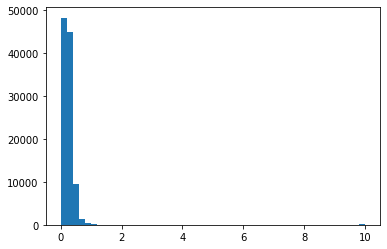

In [6]:
plt.hist(df.DebtToIncomeRatio,bins = 50);


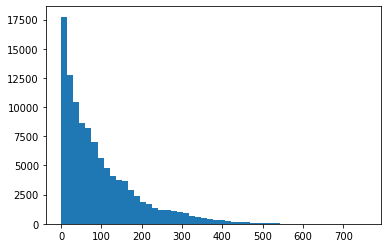

In [7]:
plt.hist(df.EmploymentStatusDuration,bins = 50);
#plt.yscale('log');

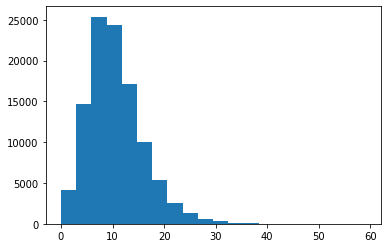

In [8]:
plt.hist(df.CurrentCreditLines,bins = 20);

In [9]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['LoanOriginationYear']  = pd.DatetimeIndex(df['LoanOriginationDate']).year

Text(0, 0.5, 'Amount of loans M$')

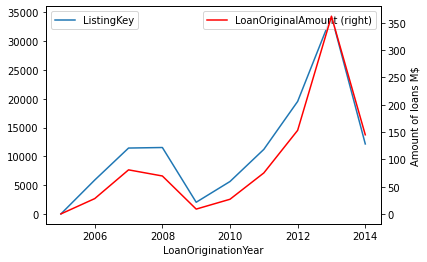

In [10]:
ax = df.groupby(['LoanOriginationYear']).agg({'ListingKey':'count'}).plot.line()
ax1 = ax.twinx()
(df.groupby(['LoanOriginationYear']).sum()[['LoanOriginalAmount']]/1000000).plot.line(ax=ax1, color='r',secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Amount of loans M$')

<AxesSubplot:title={'center':'BorrowerRate'}, xlabel='LoanOriginationYear'>

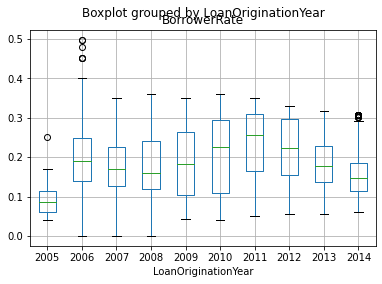

In [11]:
df.boxplot(by="LoanOriginationYear", column="BorrowerRate")


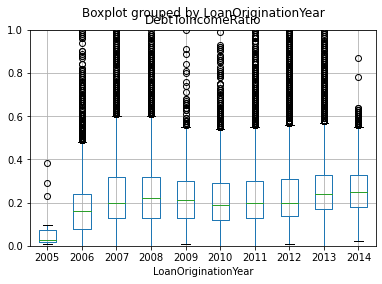

In [23]:
df.boxplot(by="LoanOriginationYear", column="DebtToIncomeRatio")
plt.ylim([0,1]);


(0.0, 10000.0)

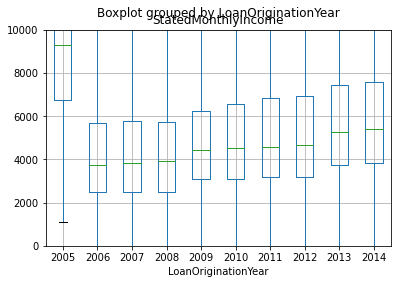

In [37]:
df.boxplot(by="LoanOriginationYear", column="StatedMonthlyIncome")
plt.ylim([0,10000])

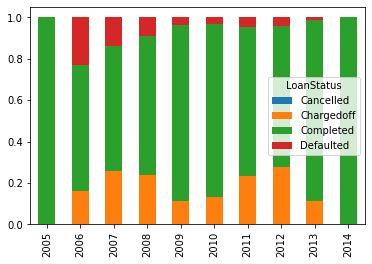

In [13]:
closedLoans = df[~df['ClosedDate'].isna()] 
time_bar(closedLoans,'LoanOriginationYear', 'LoanStatus' )

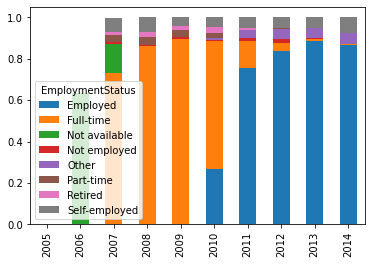

In [14]:
time_bar(df,'LoanOriginationYear','EmploymentStatus')

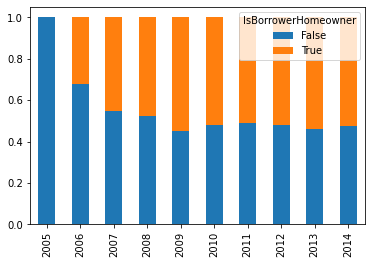

In [24]:
time_bar(df,'LoanOriginationYear','IsBorrowerHomeowner')

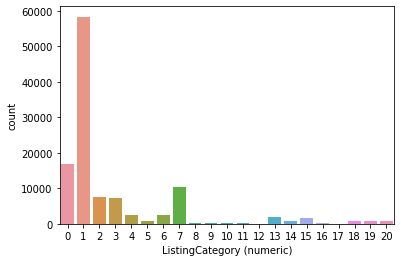

In [39]:
time_bar(df,'ListingCategory (numeric)')

In [29]:
#g = sb.PairGrid(data = df, vars = ['StatedMonthlyIncome', 'BorrowerRate', 'LoanOriginalAmount','EmploymentStatusDuration','CurrentCreditLines', ])
#g.map_diag(plt.hist)
#g.map_offdiag(plt.scatter)


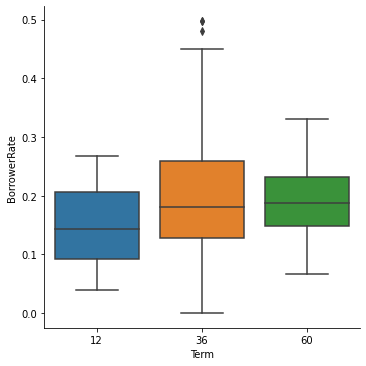

In [30]:
sb.catplot(x="Term", y="BorrowerRate", kind="box", data=df)